In [160]:
import torch
import numpy as np
import torch.nn.functional as torchF
import torch.nn as torchNN
import matplotlib.pyplot as plt
from IPython import display
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
from torchvision.transforms import ToTensor, Lambda, Compose
%matplotlib inline

In [161]:
# class Network(torchNN.Module):
#     def __init__(self) -> None:
#         super(Network, self).__init__()

#         self.layer = torchNN.Sequential(
#             torchNN.Flatten(),
#             torchNN.Linear(3 * 32 * 32, 128),
#             torchNN.LeakyReLU(),
#             torchNN.Linear(128, 64),
#             torchNN.LeakyReLU(),
#             torchNN.Linear(64, 10),
#             torchNN.Softmax(dim = 0)
#         )
    
#     def forward(self, inputData):
#         # x = inputData.view(inputData.size(0), -1)
#         return self.layer(inputData)
class Network(torchNN.Module):
    def __init__(self):
        super(Network, self).__init__()

        # self.conv1 = torchNN.Conv2d(
        #     in_channels = 3,
        #     out_channels = 6,
        #     kernel_size = 5,
        #     stride = 1,
        #     padding = 2
        # )
        
        # self.pool = torchNN.MaxPool2d(
        #     kernel_size = 2, 
        #     stride = 2
        # )

        # self.conv2 = torchNN.Conv2d(
        #     in_channels = 6,
        #     out_channels = 16,
        #     kernel_size = 5,
        #     stride = 1,
        #     padding = 2
        # )

        # self.liner1 = torchNN.Linear(16 * 5 * 5, 128)
        # self.liner2 = torchNN.Linear(120, 32)
        # self.liner3 = torchNN.Linear(32, 10)

        self.conv1 = torchNN.Sequential(
            torchNN.Conv2d(
                in_channels = 3,
                out_channels = 16,
                kernel_size = 5,
                stride = 1,
                padding = 2
            ),
            # torchF.leaky_relu(),
            torchNN.LeakyReLU(),
            torchNN.MaxPool2d(2)
        )
        

        self.conv2 = torchNN.Sequential(
            torchNN.Conv2d(
                in_channels = 16,
                out_channels = 32,
                kernel_size = 5,
                stride = 1,
                padding = 2
            ),
            # torchF.leaky_relu(),
            torchNN.LeakyReLU(),
            torchNN.MaxPool2d(2)
        )

        self.liner = torchNN.Sequential(
            torchNN.Linear(32 * 8 * 8, 64),
            torchNN.LeakyReLU(),
            torchNN.Linear(64, 32),
            torchNN.LeakyReLU(),
            torchNN.Linear(32, 10),
            # torchNN.Softmax(dim = 0)
        )

    
    def forward(self, inputData):
        x = self.conv1(inputData)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        x = self.liner(x)
        return x
    


In [162]:
trainData = datasets.CIFAR10(
    root = "../Database",
    train = True,
    download = False,
    transform = ToTensor(),
)


In [163]:
trainData, testData = random_split(trainData, lengths = [int(len(trainData) * 0.01), int(len(trainData) * 0.99)])

trainData = DataLoader(trainData, batch_size = 64)

In [164]:
model = Network()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.003)
lossFunction = torchNN.CrossEntropyLoss()

In [165]:
epochs = 32

history = {
    'loss':[]
}


for epoch in range(epochs):
    runtimeLoss = 0.0
    for index, data in enumerate(trainData):
        img, labels = data
        optimizer.zero_grad()
        outputs = model(img)
        loss = lossFunction(outputs, labels)
        loss.backward()
        optimizer.step()
        runtimeLoss += loss.item()

    history['loss'].append(runtimeLoss)

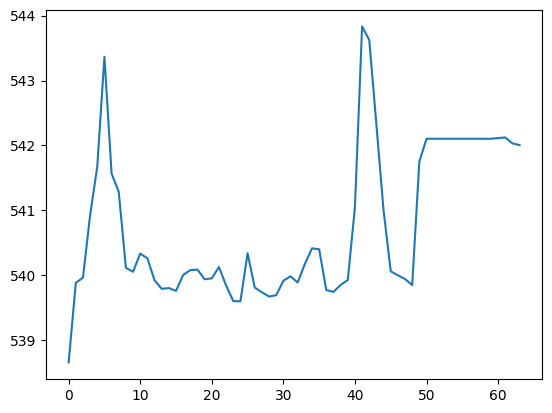

In [ ]:
plt.plot(history['loss'])